In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Load data

In [7]:
df = pd.read_csv("data/committee.csv")
df.head()


,Mentored Graduation Thesis Title,Student,Mentor,C2,C3,Thesis Application Date,Thesis Status,Mentored Graduation Thesis Desc,Thesis_Desc_EN,Thesis Title EN
0,Паметна мобилна апликација TeamUp,211172 - Теодора Ковачка,Костадин Мишев,Сашо Граматиков,Мила Додевска,23.09.2025,Прифаќање на темата од студентот,Мобилна апликација за креирање и земање дел од...,Mobile application for creation and taking par...,Smart mobile app Teamup
1,Мобилна апликација за гласање на седници,211083 - Викторија Петреска,Петре Ламески,Дејан Спасов,Мила Додевска,23.09.2025,Прифаќање на темата од студентот,Во рамките на оваа дипломска работа ќе биде ди...,"Within this degree work, a software solution w...",Mobile app for sessions voting
2,"Етика во Вештачка интлегенција, балансот помеѓ...",201028 - Климентина Ѓуревска,Игор Мишковски,Сашо Граматиков,Марија Стојчева,22.09.2025,Прифаќање на темата од студентот,Овој дипломски труд има за цел да ја истакне в...,This graduate thesis aims to emphasize the imp...,"Ethics in artificial intration, the balance be..."
3,Имплементација на Python базирана алатка за из...,213296 - Дионис Минев,Дејан Спасов,Весна Димитриевска Ристовска,Петар Секулоски,22.09.2025,Прифаќање на темата од студентот,Оваа дипломска работа презентира развој на соф...,This degree work presents the development of a...,Implementation of Python based tool for extrac...
4,Имплементација на OCPI протоколот како клучен ...,161169 - Костадин Крстев,Костадин Мишев,Сашо Граматиков,Елена Атанасоска,22.09.2025,Одобрение од продекан за настава,Модернизацијата во автомобилската индустрија н...,Modernization in the automotive industry has i...,Implementation of the OCPI Protocol as a key f...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Mentored Graduation Thesis Title  3266 non-null   object
 1   Student                           3266 non-null   object
 2   Mentor                            3266 non-null   object
 3   C2                                3266 non-null   object
 4   C3                                3266 non-null   object
 5   Thesis Application Date           3266 non-null   object
 6   Thesis Status                     3266 non-null   object
 7   Mentored Graduation Thesis Desc   3266 non-null   object
 8   Thesis_Desc_EN                    3266 non-null   object
 9   Thesis Title EN                   3266 non-null   object
dtypes: object(10)
memory usage: 255.3+ KB


# Exploratory Data Analysis

## Thesis status

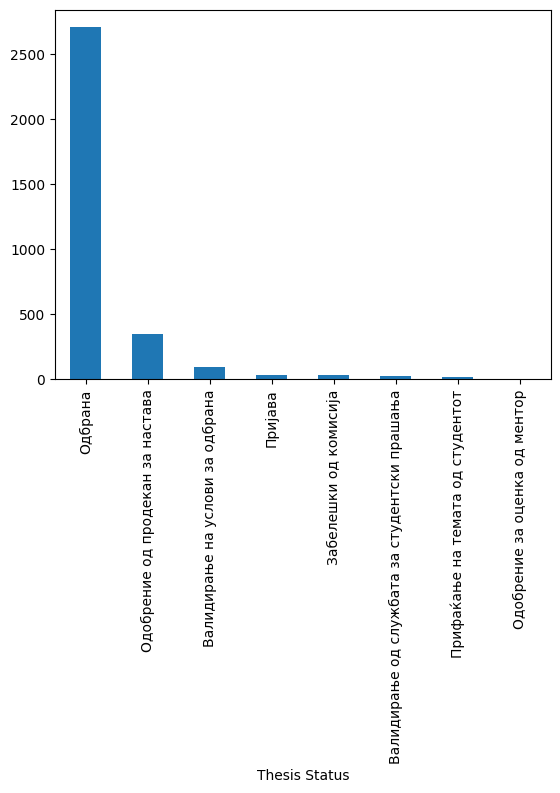

In [18]:
df["Thesis Status"].value_counts().plot.bar()
plt.show()

## Mentor

In [30]:
df["Mentor"].value_counts().to_frame()

,count
Mentor,
Смилка Јанеска Саркањац,402
Иван Чорбев,278
Димитар Трајанов,253
Иван Китановски,194
Ристе Стојанов,167
Магдалена Костоска,151
Петре Ламески,127
Георгина Мирчева,122
Билјана Стојкоска,88


In [ ]:
df[df["Mentor"].isin(["Верица Бакева Смиљковa"])]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `str`